## Introducing Optimization for Perona Malik diffusion

In [1]:
from imageio import imread
from skimage.transform import resize
from cv2 import blur
from matplotlib import pyplot as plt
from matplotlib import animation, rc

from IPython.display import HTML
#%matplotlib notebook

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
h=200

/home/cpinard/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/cpinard/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


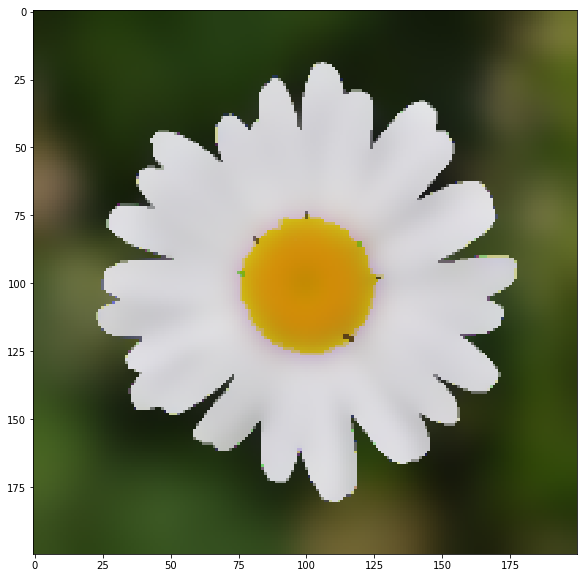

In [2]:
from loss_functions import diffusion_loss, robust_diffusion_loss
fig = plt.figure(figsize=(10,10))

image = resize(imread('img/foreground.jpg'), (h, h))
image_tensor = torch.from_numpy(image.transpose(2,0,1)).float().to(device)
#image_tensor += torch.linspace(-0.5,0.5,h).view(1,1,h).float().cuda()
image_plot = plt.imshow(image, animated=True)

img_param = torch.nn.Parameter(image_tensor.clone().unsqueeze(0))
#optimizer = torch.optim.Adam([img_param], lr=0.1)
optimizer = torch.optim.SGD([img_param], lr=1, momentum=0)


def animate(i):
    for _ in range(1):
        loss = 10000*robust_diffusion_loss(img_param, None, kappa=0.1, iterations=10, gamma=0.2, loss_function='MSE')
        #loss = 10000*diffusion_loss(img_param, img_param, kappa=0.3)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #image_tmp = blur(image, (1+2*i,1+2*i))
    to_plot = img_param[0].detach().cpu().numpy().transpose(1,2,0).clip(0,1)
    image_plot.set_array(to_plot)
    return (image_plot,)

ani = animation.FuncAnimation(fig, animate, interval=100, frames=30, blit=True)
HTML(ani.to_html5_video())

## Just for fun : PM diffusion of gradient

You can try robust grad diffusion loss2 which is essentially diffusion of each gradient coordinate independently (and that results are very poor)

/home/cpinard/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/cpinard/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


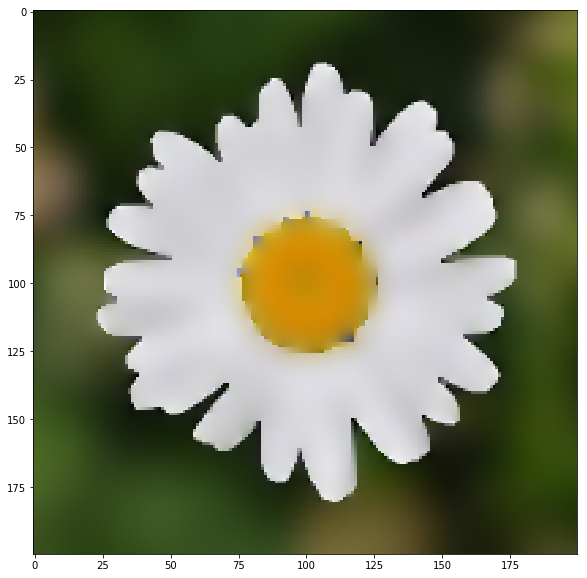

In [2]:
from imageio import imread
from skimage.transform import resize
from cv2 import blur
from loss_functions import grad_diffusion_loss, robust_grad_diffusion_loss, robust_grad_diffusion_loss2
fig = plt.figure(figsize=(10,10))
image = resize(imread('img/foreground.jpg'), (h, h))
image_tensor = torch.from_numpy(image.transpose(2,0,1)).float().to(device)
#image_tensor += torch.linspace(-0.5,0.5,h).view(1,1,h).float().cuda()
image_plot = plt.imshow(image, animated=True)

img_param = torch.nn.Parameter(image_tensor.clone().unsqueeze(0))
#optimizer = torch.optim.Adam([img_param], lr=0.01)
optimizer = torch.optim.SGD([img_param], lr=1, momentum=0.9)

def animate(i):
    #loss = PM_smooth_loss(img_param, None, kappa=.100).sum()
    for j in range(10):
        #loss = 1000*grad_diffusion_loss(img_param, img_param, kappa=0.1)
        loss = 100*robust_grad_diffusion_loss(img_param, img_param, kappa=0.1, iterations=10, gamma=0.2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #image_tmp = blur(image, (1+2*i,1+2*i))
    to_plot = img_param[0].detach().cpu().numpy().transpose(1,2,0).clip(0,1)
    image_plot.set_array(to_plot)
    return (image_plot,)
ani = animation.FuncAnimation(fig, animate, interval=100, frames=300, blit=True)
HTML(ani.to_html5_video())
#pt.show()